In [279]:
import numpy as np
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
from mayavi import mlab

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

# Installing collected packages: traits, configobj, pyface, vtk, traitsui, apptools, envisage, mayavi
# Successfully installed apptools-5.2.0 configobj-5.0.8 envisage-7.0.3 mayavi-4.8.1 pyface-8.0.0 traits-6.4.1 traitsui-8.0.0 vtk-9.2.6

In [80]:
poly = gpd.read_file('jerus_area.geojson').loc[0, 'geometry']
# G = ox.graph_from_polygon(poly, network_type='all_private')
G = ox.graph_from_polygon(poly, network_type='walk')

poly_center = poly.centroid.coords[0]
poly_list = np.array(poly.exterior.coords)

/Users/raphael/Programs/miniconda3/envs/yahel/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/raphael/Programs/miniconda3/envs/yahel/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/raphael/Programs/miniconda3/envs/yahel/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/raphael/Programs/miniconda3/envs/yahel/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/raphael/Programs/miniconda3/envs/yahel/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


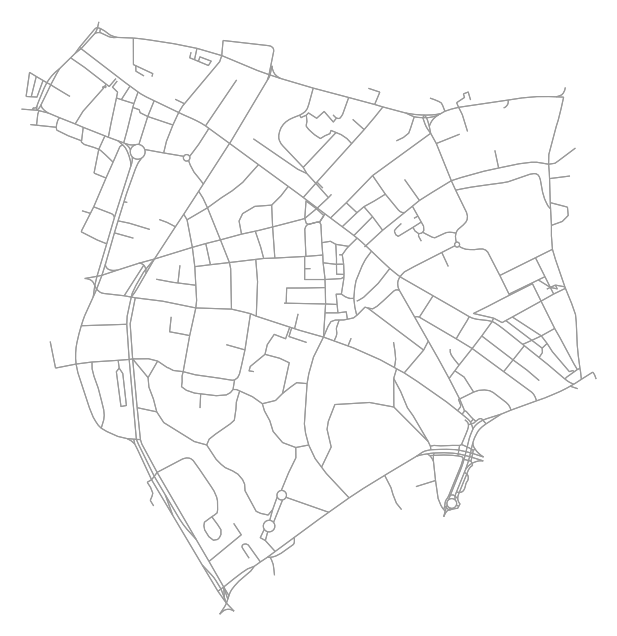

In [75]:
# visualize the graph G in an aesthetically pleasing way
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.8, edge_color='#999999', bgcolor='white')

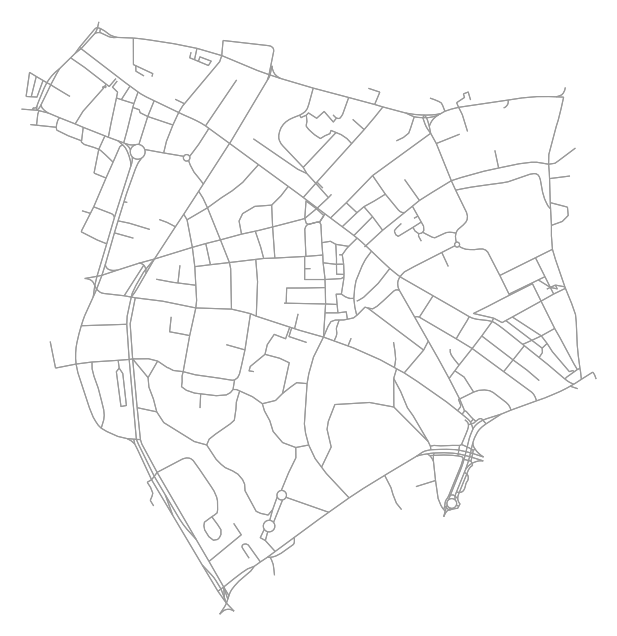

In [43]:
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.8, edge_color='#999999', bgcolor='white')

In [46]:
G.size()

1494

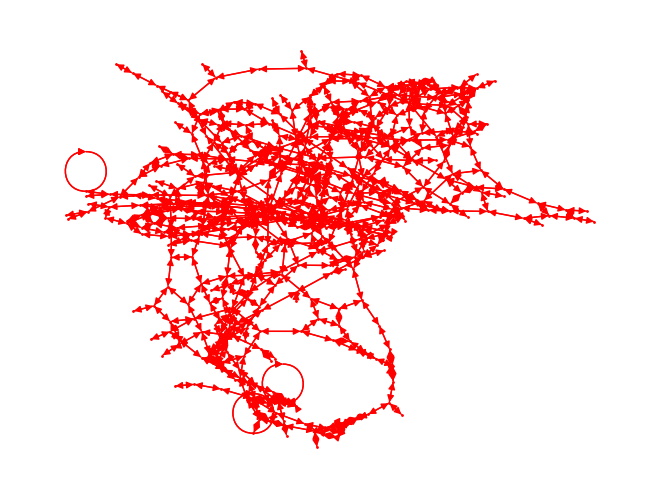

In [76]:
nx.draw(G, node_size=1, node_color='red', edge_color='red')

35.21328126847237

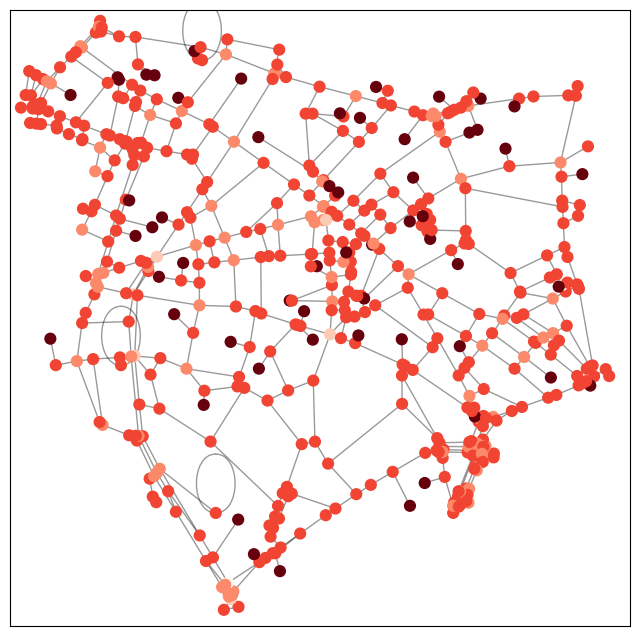

In [79]:
# find node near center (0.5,0.5)
dmin = 100000
ncenter = 0
for n in G.nodes().data():
    x, y = n[1]['x'], n[1]['y'] 
    nx.set_node_attributes(G, {n[0]: {'pos': (x, y)}})
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n[0]
        dmin = d

pos = nx.get_node_attributes(G, 'pos')

# color by path length from node near center
# p = dict(nx.single_source_shortest_path_length(G, ncenter))
p =dict(nx.get_node_attributes(G, 'street_count'))


plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.4, width=1, arrows=False)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=60,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

plt.xlim(poly_list[:,0].min(axis=0), poly_list[:,0].max(axis=0))
plt.ylim(poly_list[:,1].min(axis=0), poly_list[:,1].max(axis=0))
# plt.axis("off")
plt.show()

In [106]:
np.random.rand(2)

array([0.17134443, 0.75492296])

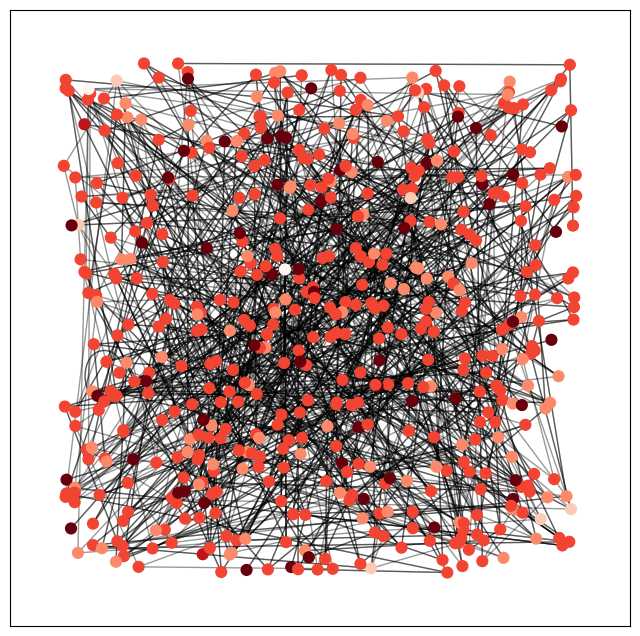

In [22]:
# find node near center (0.5,0.5)
dmin = 100000
ncenter = 0
for n in G.nodes().data():
    x, y = n[1]['x'], n[1]['y'] 
    nx.set_node_attributes(G, {n[0]: {'pos': np.random.rand(2)}})
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n[0]
        dmin = d

pos = nx.get_node_attributes(G, 'pos')

# color by path length from node near center
# p = dict(nx.single_source_shortest_path_length(G, ncenter))
p =dict(nx.get_node_attributes(G, 'street_count'))


plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.4, width=1, arrows=False)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=60,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

# plt.xlim(poly_list[:,0].min(axis=0), poly_list[:,0].max(axis=0))
# plt.ylim(poly_list[:,1].min(axis=0), poly_list[:,1].max(axis=0))
# plt.axis("off")
plt.show()

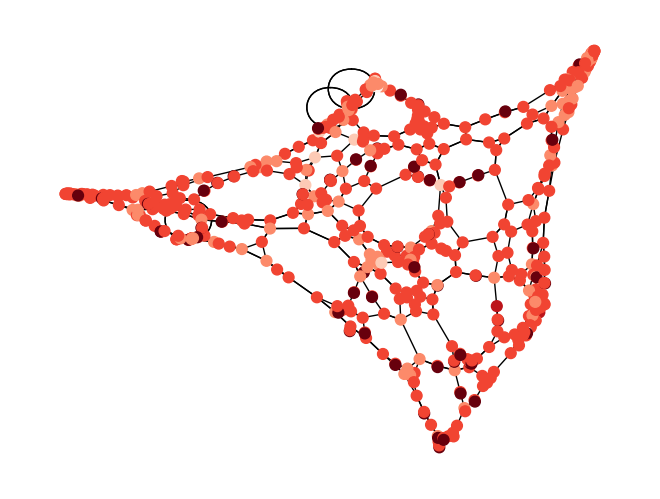

In [112]:
nx.draw_spectral(G,     nodelist=list(p.keys()),
    node_size=60,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r, arrows=False
)

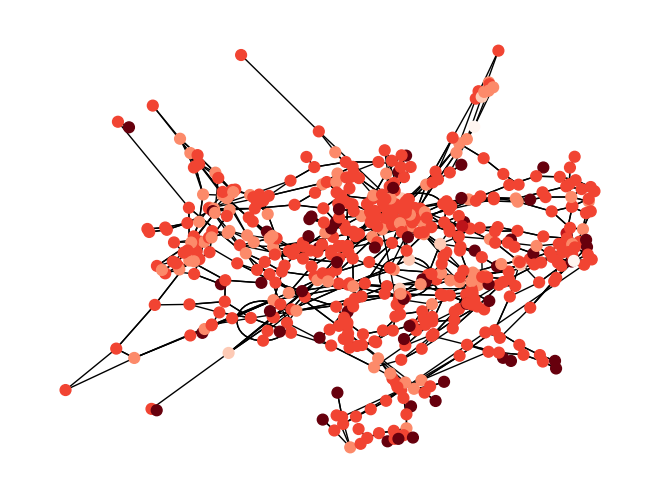

In [23]:
nx.draw_spring(G,     nodelist=list(p.keys()),
    node_size=60,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r, arrows=False
)

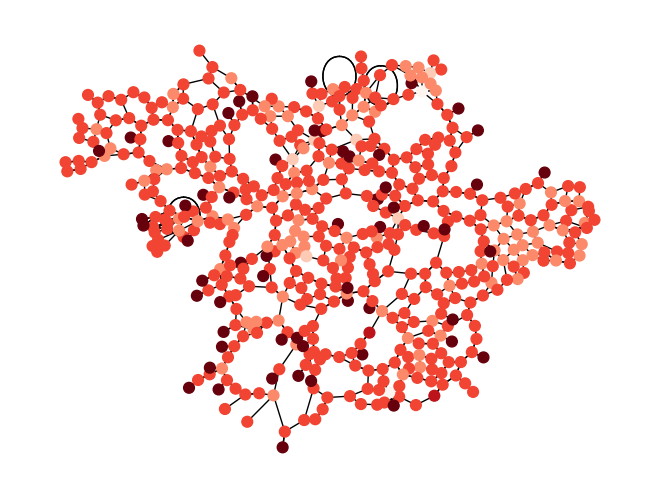

In [114]:
nx.draw_kamada_kawai(G,     nodelist=list(p.keys()),
    node_size=60,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r, arrows=False
)

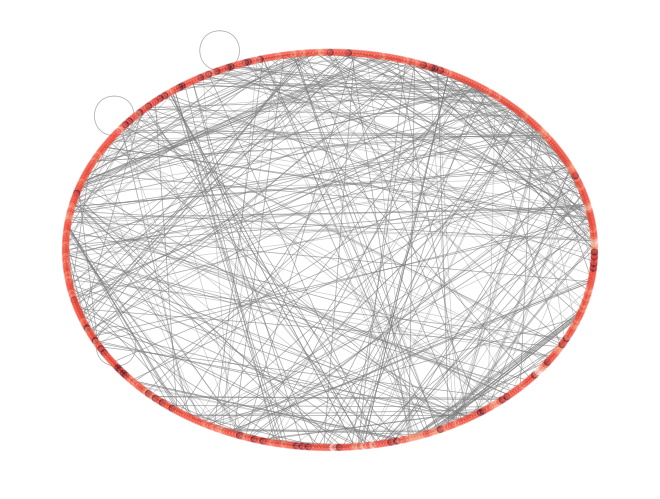

In [123]:
nx.draw_circular(G,     nodelist=list(p.keys()),
    node_size=20,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r, arrows=False, edge_color='grey', alpha=0.4, width=0.5
)

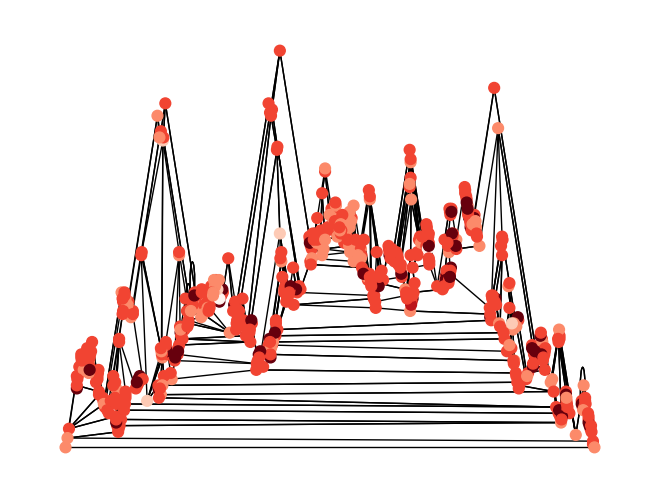

In [27]:
nx.draw_planar(G,     nodelist=list(p.keys()),
    node_size=60,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r, arrows=False
)

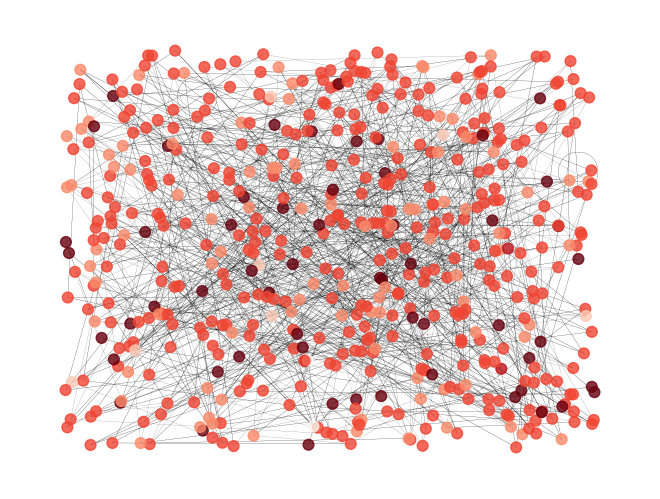

In [134]:
nx.draw_random(G,     nodelist=list(p.keys()),
    node_size=60,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r, arrows=False, alpha=0.8, width=0.1
)

In [ ]:
# draw 3d network using mayavi

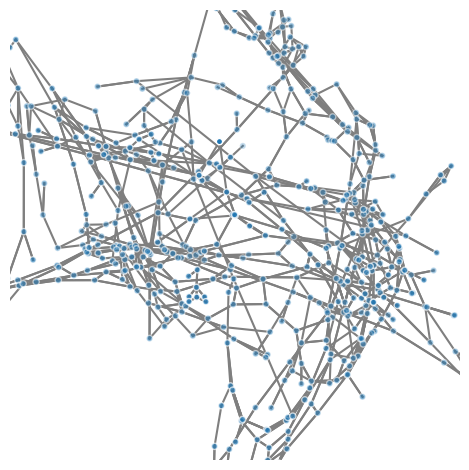

In [20]:
# 3d spring layout
pos = nx.spring_layout(G, dim=3, seed=np.random.randint(0, 1000))
# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=20, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    ax.set_facecolor('white')
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    # ax.set_xlabel("x")
    # ax.set_ylabel("y")
    # ax.set_zlabel("z")
    RADIUS = 0.5  # Control this value.
    ax.set_xlim3d(-RADIUS / 2, RADIUS / 2)
    ax.set_zlim3d(-RADIUS / 2, RADIUS / 2)
    ax.set_ylim3d(-RADIUS / 2, RADIUS / 2)

    ax.set_axis_off()
    # ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))




# fig.set_facecolor('white')
_format_axes(ax)
fig.tight_layout()
plt.show()

In [132]:
list(nx.selfloop_edges(G))

[(1703341429, 1703341429),
 (1703341429, 1703341429),
 (1712600379, 1712600379),
 (1712600379, 1712600379),
 (2830886590, 2830886590),
 (2830886590, 2830886590)]

{29942555: [35.2194024, 31.7818548],
 29942557: [35.218733, 31.781704],
 29942559: [35.2170617, 31.7813428],
 29942560: [35.2162713, 31.7811359],
 29942579: [35.2157903, 31.7804627],
 29942580: [35.2171338, 31.7802703],
 29942582: [35.2182723, 31.7801686],
 29942583: [35.2183925, 31.7801248],
 29942707: [35.2171126, 31.7810011],
 29942708: [35.2178333, 31.7810738],
 29942709: [35.2187791, 31.7811531],
 29942710: [35.2197773, 31.7812063],
 29942714: [35.218713, 31.7820901],
 29942716: [35.2168825, 31.7819281],
 29942717: [35.2172916, 31.7824644],
 29942747: [35.2219716, 31.7779067],
 29942786: [35.2183822, 31.7811296],
 29942948: [35.2159456, 31.7810607],
 29942951: [35.2163281, 31.7773604],
 29942953: [35.2158185, 31.7793682],
 29947084: [35.2147123, 31.7848829],
 29947178: [35.2242284, 31.7786265],
 29947372: [35.2231236, 31.7776326],
 29979638: [35.2245593, 31.7813079],
 29979668: [35.2181571, 31.7795277],
 29979690: [35.2194506, 31.778931],
 29979737: [35.2178762, 31.7802494],
 2998

In [228]:
H.nodes(data=True)

NodeDataView({29942555: {'y': 31.7818548, 'x': 35.2194024, 'street_count': 4, 'pos': array([0.03577275, 0.3981302 ])}, 29942557: {'y': 31.781704, 'x': 35.218733, 'street_count': 4, 'pos': array([0.79724312, 0.25914933])}, 29942559: {'y': 31.7813428, 'x': 35.2170617, 'street_count': 4, 'pos': array([0.89003351, 0.67379611])}, 29942560: {'y': 31.7811359, 'x': 35.2162713, 'highway': 'traffic_signals', 'street_count': 5, 'pos': array([0.20431921, 0.67001334])}, 29942579: {'y': 31.7804627, 'x': 35.2157903, 'highway': 'traffic_signals', 'street_count': 5, 'pos': array([0.76585737, 0.02353391])}, 29942580: {'y': 31.7802703, 'x': 35.2171338, 'street_count': 4, 'pos': array([0.857402  , 0.04389489])}, 29942582: {'y': 31.7801686, 'x': 35.2182723, 'street_count': 3, 'pos': array([0.24570199, 0.42163203])}, 29942583: {'y': 31.7801248, 'x': 35.2183925, 'street_count': 3, 'pos': array([0.7417725 , 0.06008529])}, 29942707: {'y': 31.7810011, 'x': 35.2171126, 'street_count': 3, 'pos': array([0.66354897

In [257]:
H = nx.Graph(G)
H.remove_edges_from(list(nx.selfloop_edges(H)))

nx.set_node_attributes(H, {d[0]:[d[1]['x'], d[1]['y']] for d in H.nodes(data=True)}, 'pos')
pos = nx.get_node_attributes(H, 'pos')


seed = np.random.randint(0, 1000)
# seed = 1558
seed = 239
print(seed)
layout = nx.spring_layout(H, pos=None, iterations =3000 ,seed=seed, k=2/np.sqrt(len(H.nodes())))

239


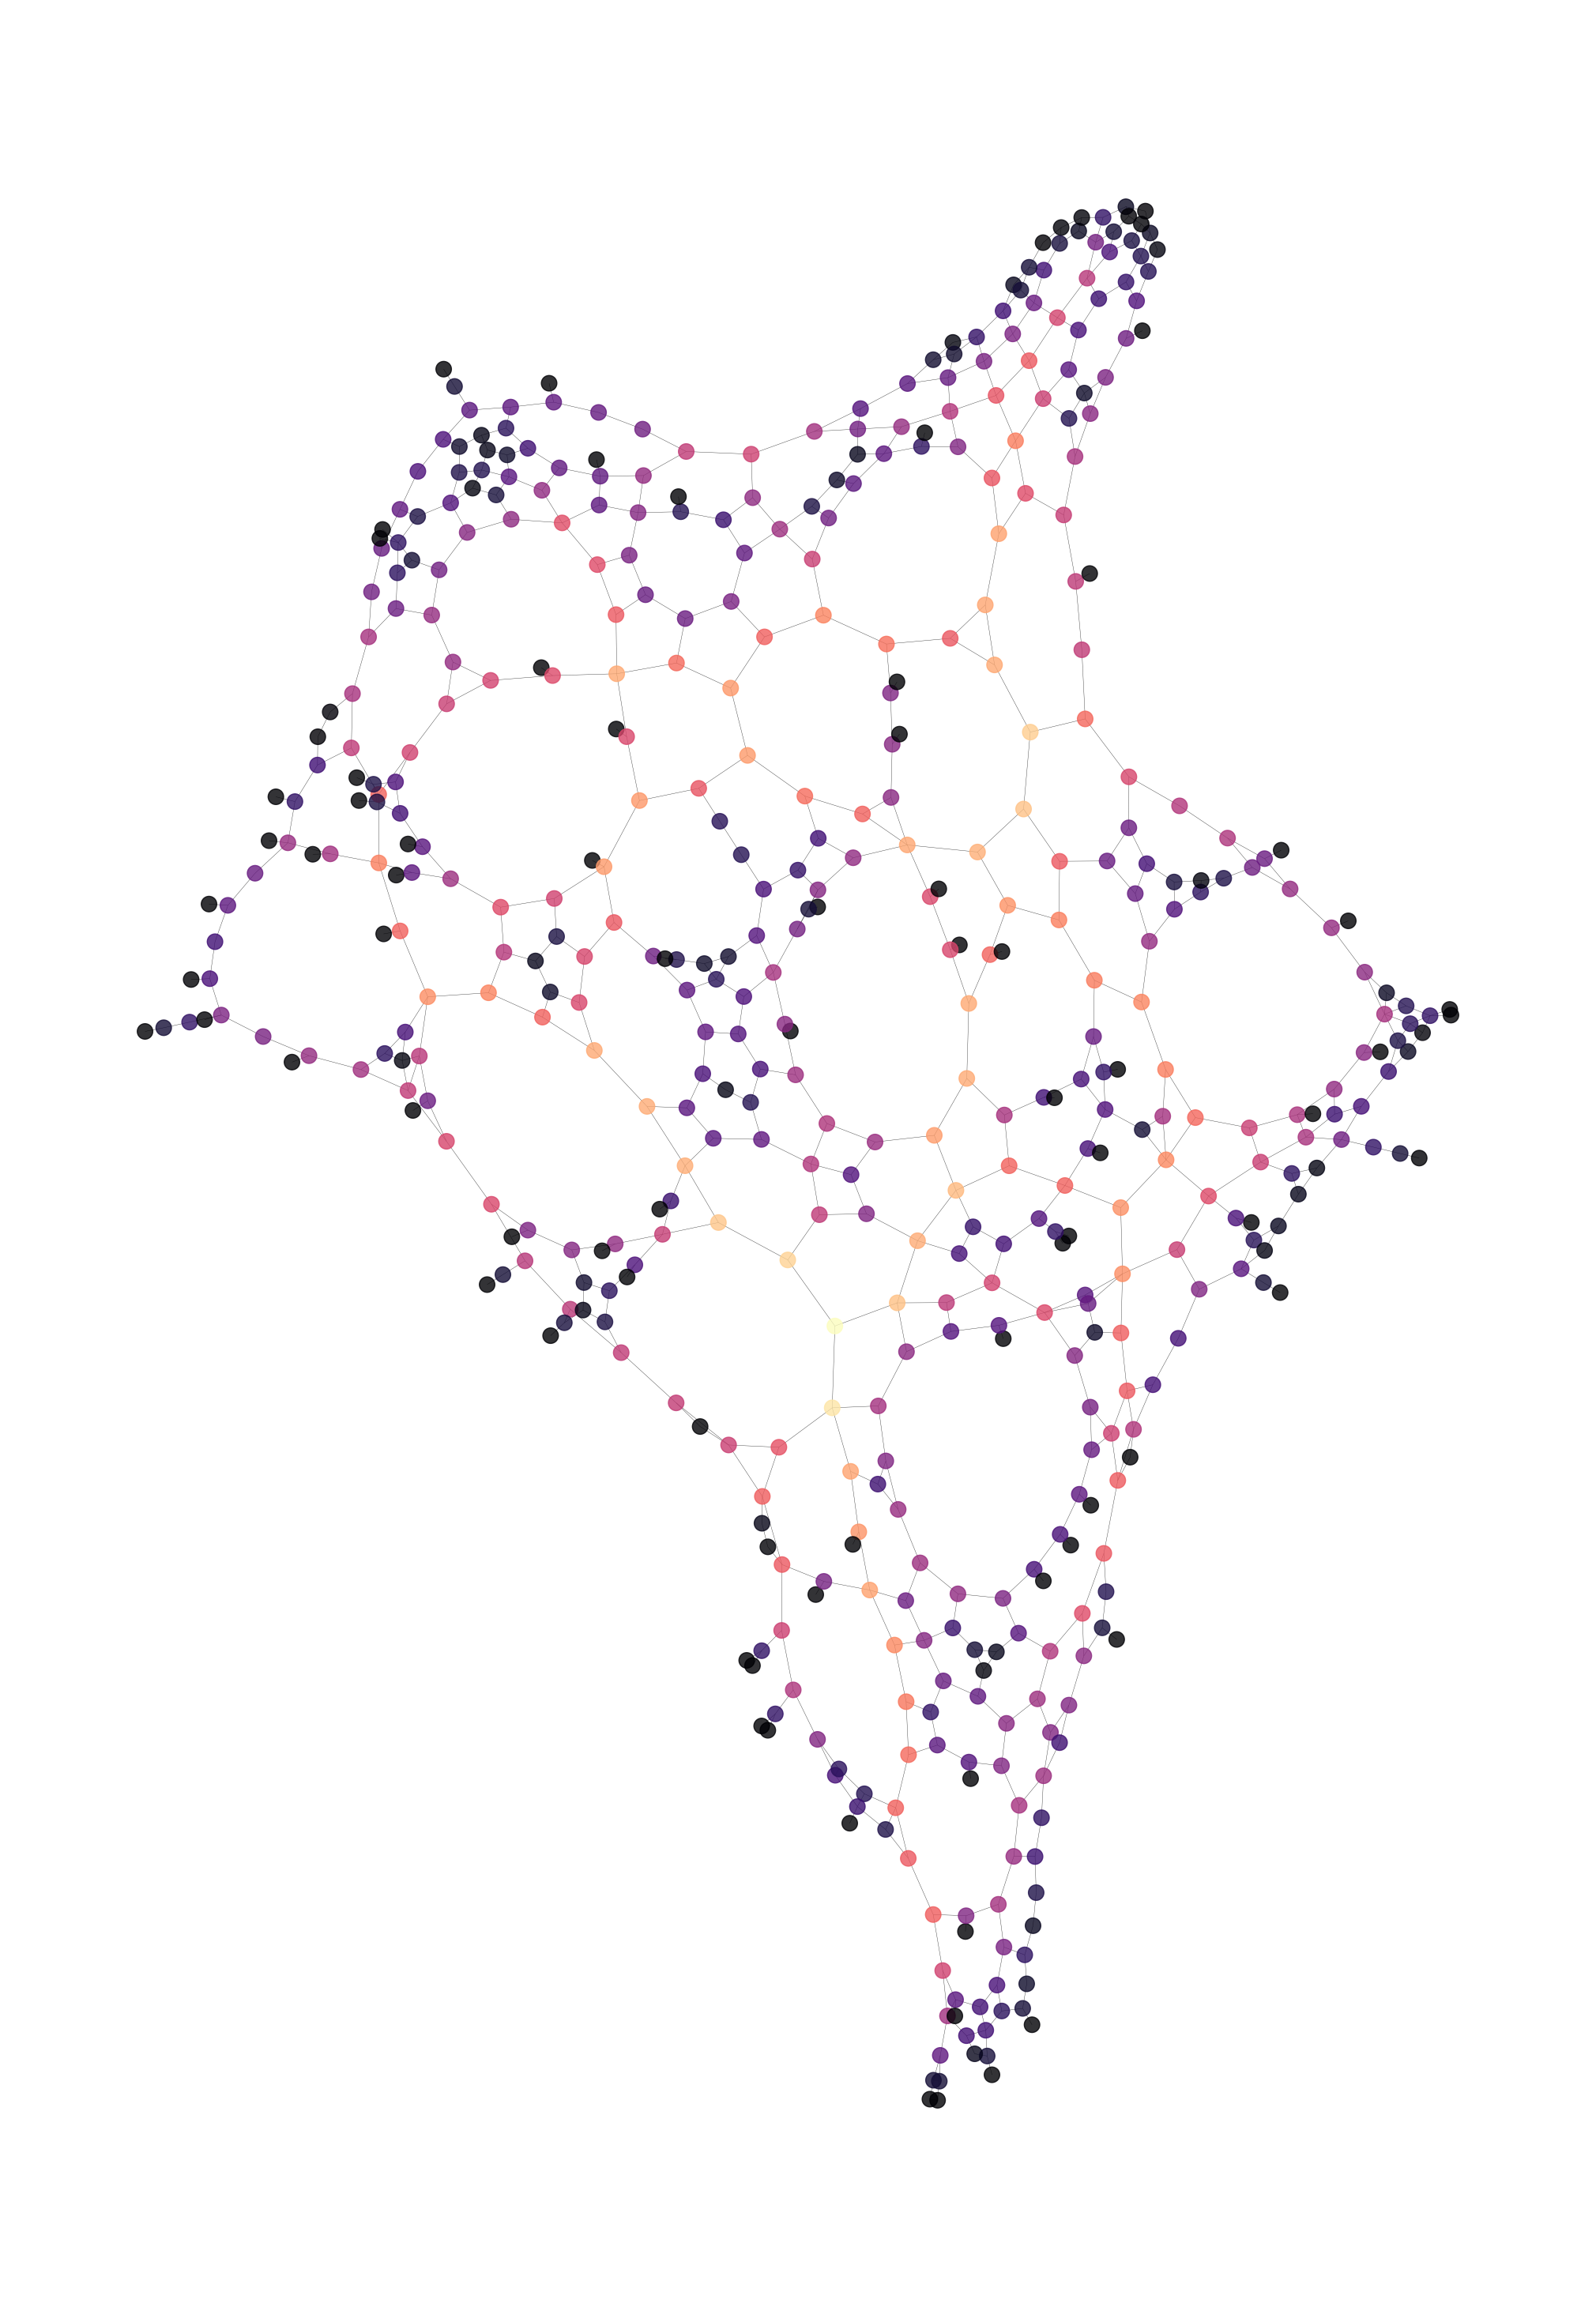

In [258]:

# q = nx.degree_centrality(H)
# q = nx.closeness_centrality(H)
q = nx.betweenness_centrality(H)
# q = nx.eigenvector_centrality(H, max_iter=1000)
# q = nx.load_centrality(H)
# q = nx.katz_centrality(H)
# q = nx.laplacian_centrality(H)
# q = nx.clustering(H)

q = {k: np.log10(v+1e-2) for k, v in q.items()}

vmin , vmax = min(q.values()), max(q.values())
cmap = plt.cm.magma

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.figure(figsize=(2000*px, 2900*px))

drawing = nx.draw(H,     
    pos = layout,
    nodelist=list(q.keys()),
    node_size=200,
    node_color=list(q.values()), vmin=vmin, vmax=vmax,
    cmap=cmap, arrows=False, alpha=0.8, width=0.3
)


plt.axis('off')
plt.gca().set_position([0, 0, 1, 1])

'cividis'

/Users/raphael/Programs/miniconda3/envs/yahel/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


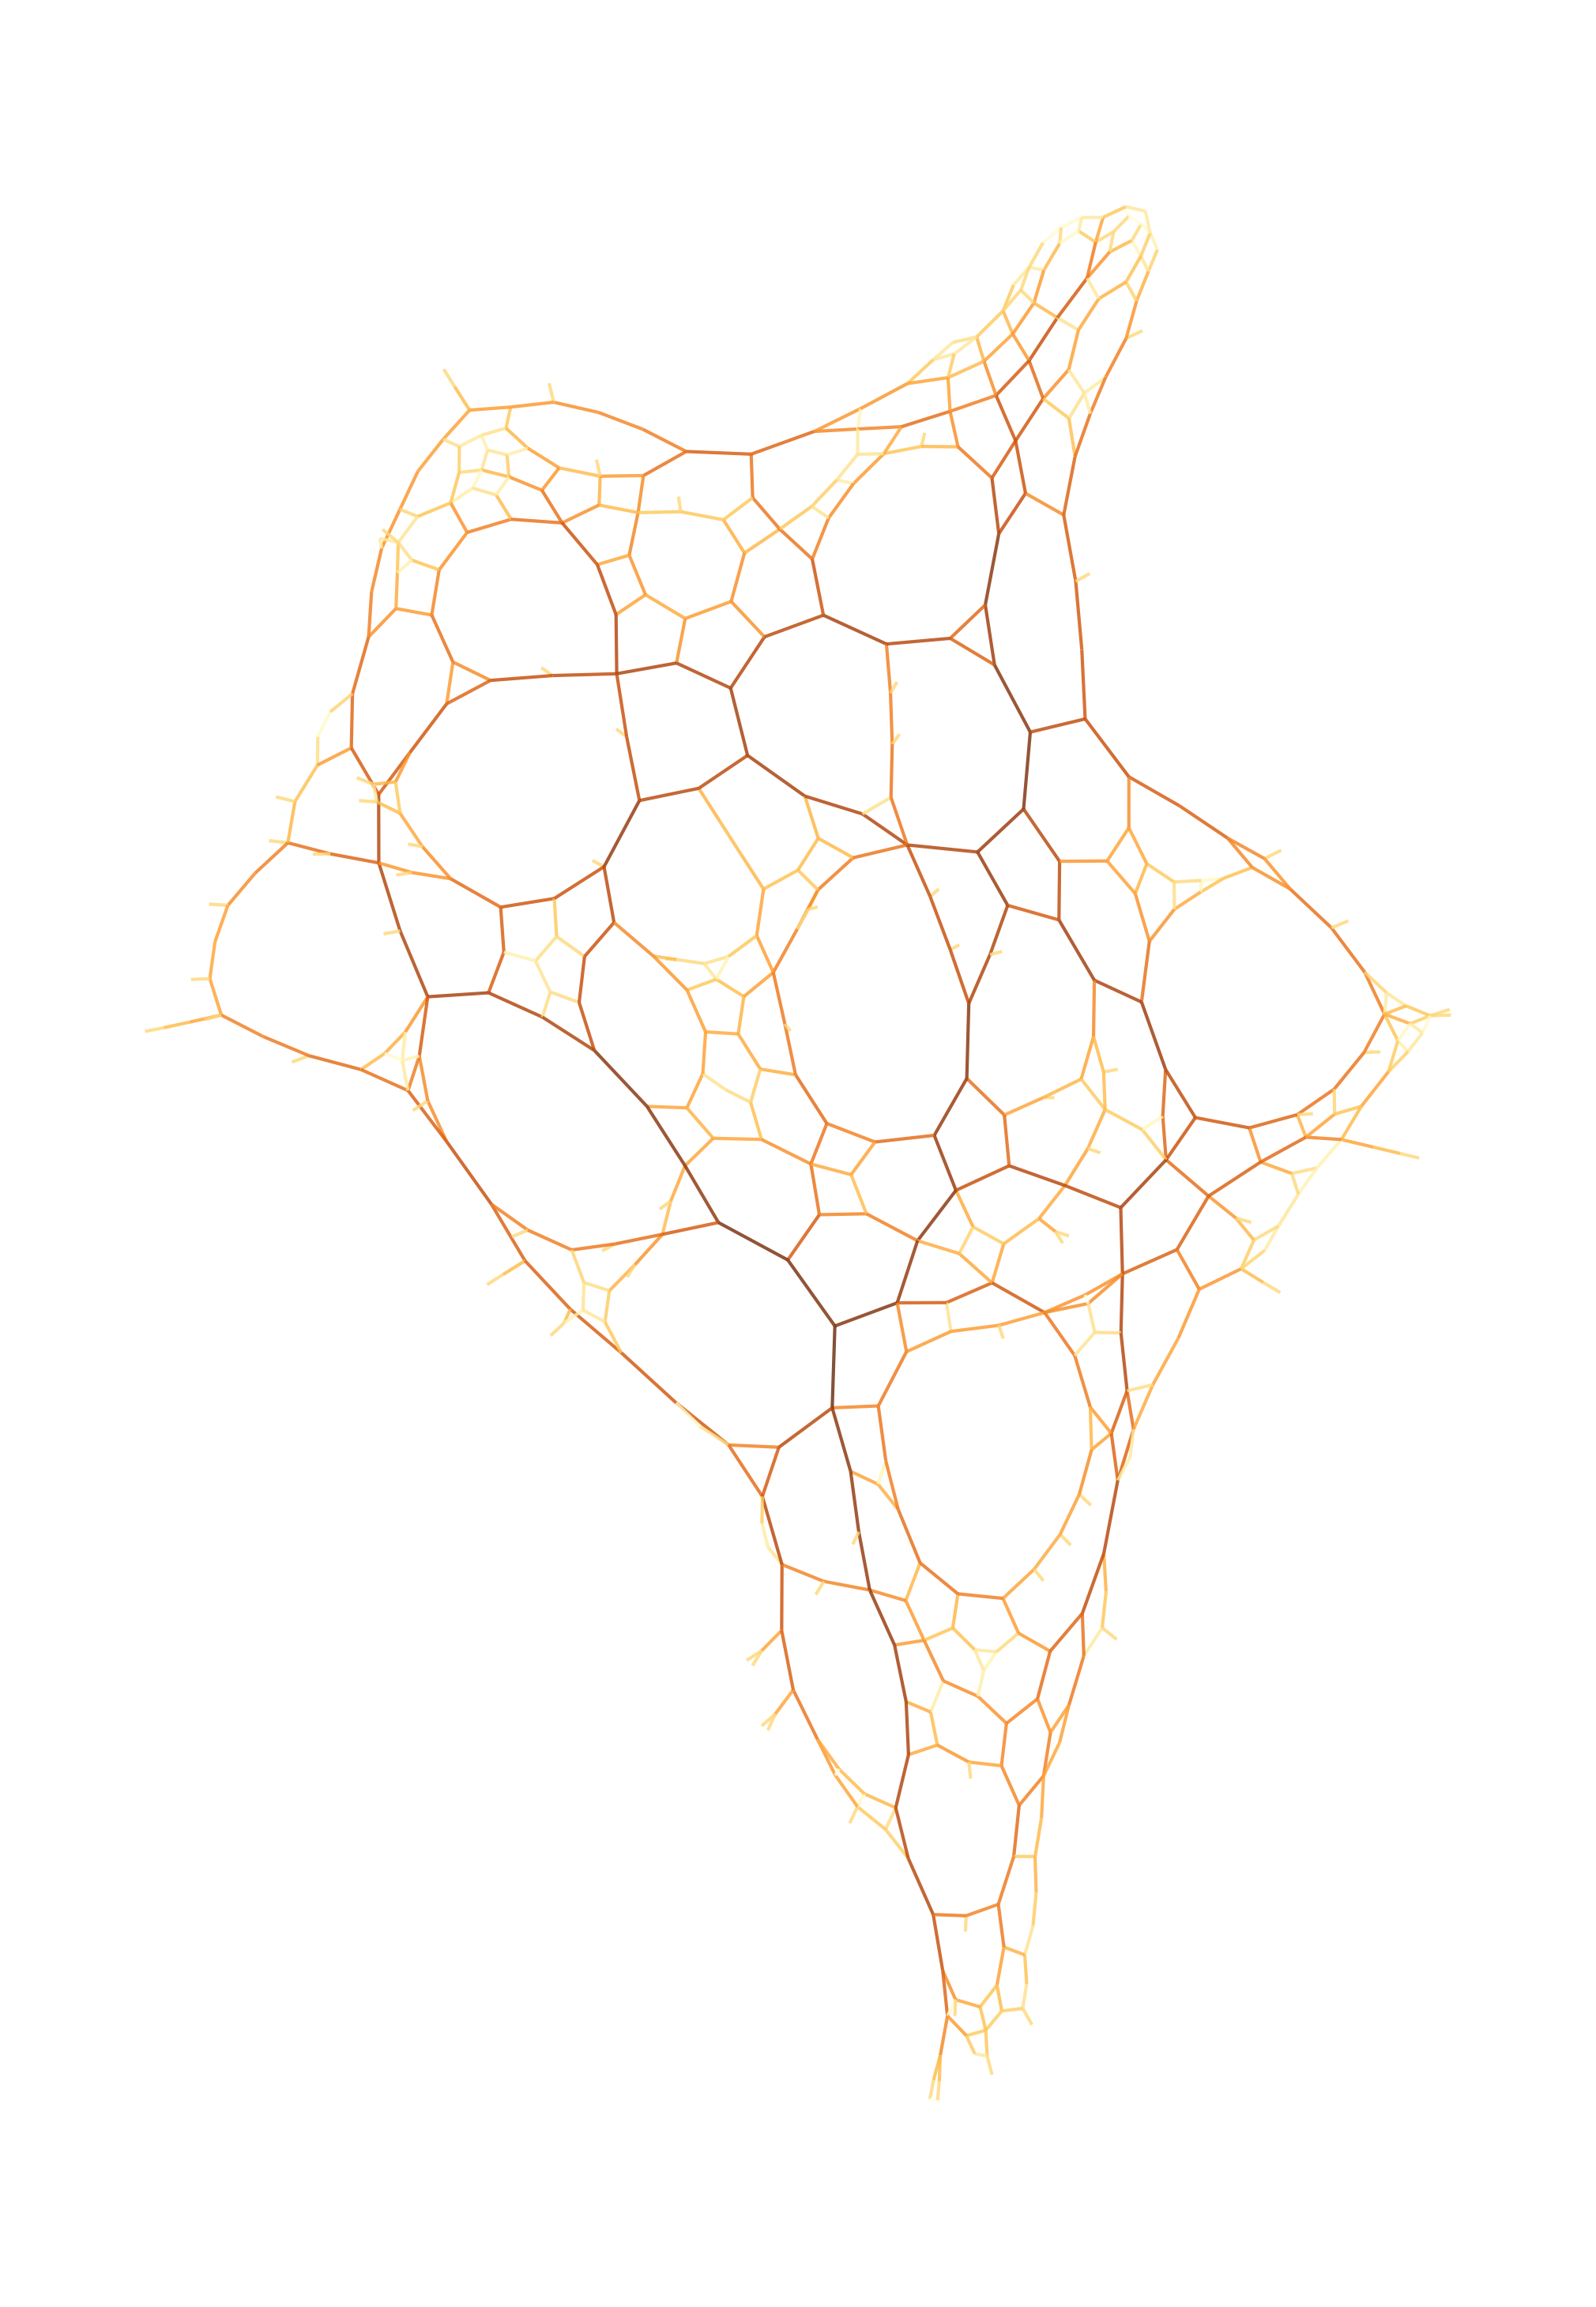

In [294]:

q = nx.edge_betweenness_centrality(H)
# q = nx.edge_



q = {k: np.log10(v+1e-3) for k, v in q.items()}

vmin , vmax = min(q.values()), max(q.values())
cmap = plt.cm.YlOrBr

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.figure(figsize=(2000*px, 2900*px))

drawing = nx.draw(H,     
    pos = layout,
    edgelist=list(q.keys()),
    node_size=0,
    edge_color=list(q.values()), vmin=vmin, vmax=vmax,
    edge_cmap=cmap, arrows=False, alpha=0.8, width=3
)


plt.axis('off')
plt.gca().set_position([0, 0, 1, 1])

fname = 'edge_bw_'
plt.savefig(f'./output/{fname}{cmap.name}.png', dpi='figure', bbox_inches='tight')
plt.savefig(f'./output/{fname}{cmap.name}.svg')

In [263]:
# q = nx.edge_betweenness_centrality(H)

# q = {k: np.log10(v+1e-3) for k, v in q.items()}
# plt.hist(q.values(), bins=100)

In [297]:
nx.set_edge_attributes(H, q, 'bw_centrality')

In [303]:
H.edges[i]

{'osmid': 463187604,
 'name': 'יפו',
 'highway': 'pedestrian',
 'oneway': False,
 'reversed': True,
 'length': 70.604,
 'bw_centrality': -0.7191451811841353}

In [305]:
H.edges[i]

{'osmid': 463187604,
 'name': 'יפו',
 'highway': 'pedestrian',
 'oneway': False,
 'reversed': True,
 'length': 36.757999999999996,
 'geometry': <LINESTRING (35.219 31.782, 35.219 31.782, 35.219 31.782)>,
 'bw_centrality': -0.8024395005034013}

In [323]:
H.edges[idxs[10]]

{'osmid': 156019045,
 'name': 'מרדכי בן הלל',
 'highway': 'pedestrian',
 'oneway': False,
 'reversed': True,
 'length': 47.982,
 'bw_centrality': -0.8979730602208864}

In [307]:
idxs = sorted(H.edges(), key=lambda x: H.edges[x]['bw_centrality'], reverse=True)

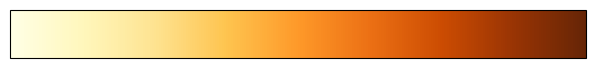

In [295]:
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig=plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
# cbar = plt.colorbar(sm,orientation='horizontal', pad=0.01, shrink=2)
cbar=mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap=cmap)
cbar.ax.tick_params(size=0)
cbar.set_ticks([])

plt.savefig(f'./output/cbar_{cmap.name}.png', dpi='figure', bbox_inches='tight')
plt.savefig(f'./output/cbar_{cmap.name}.svg')

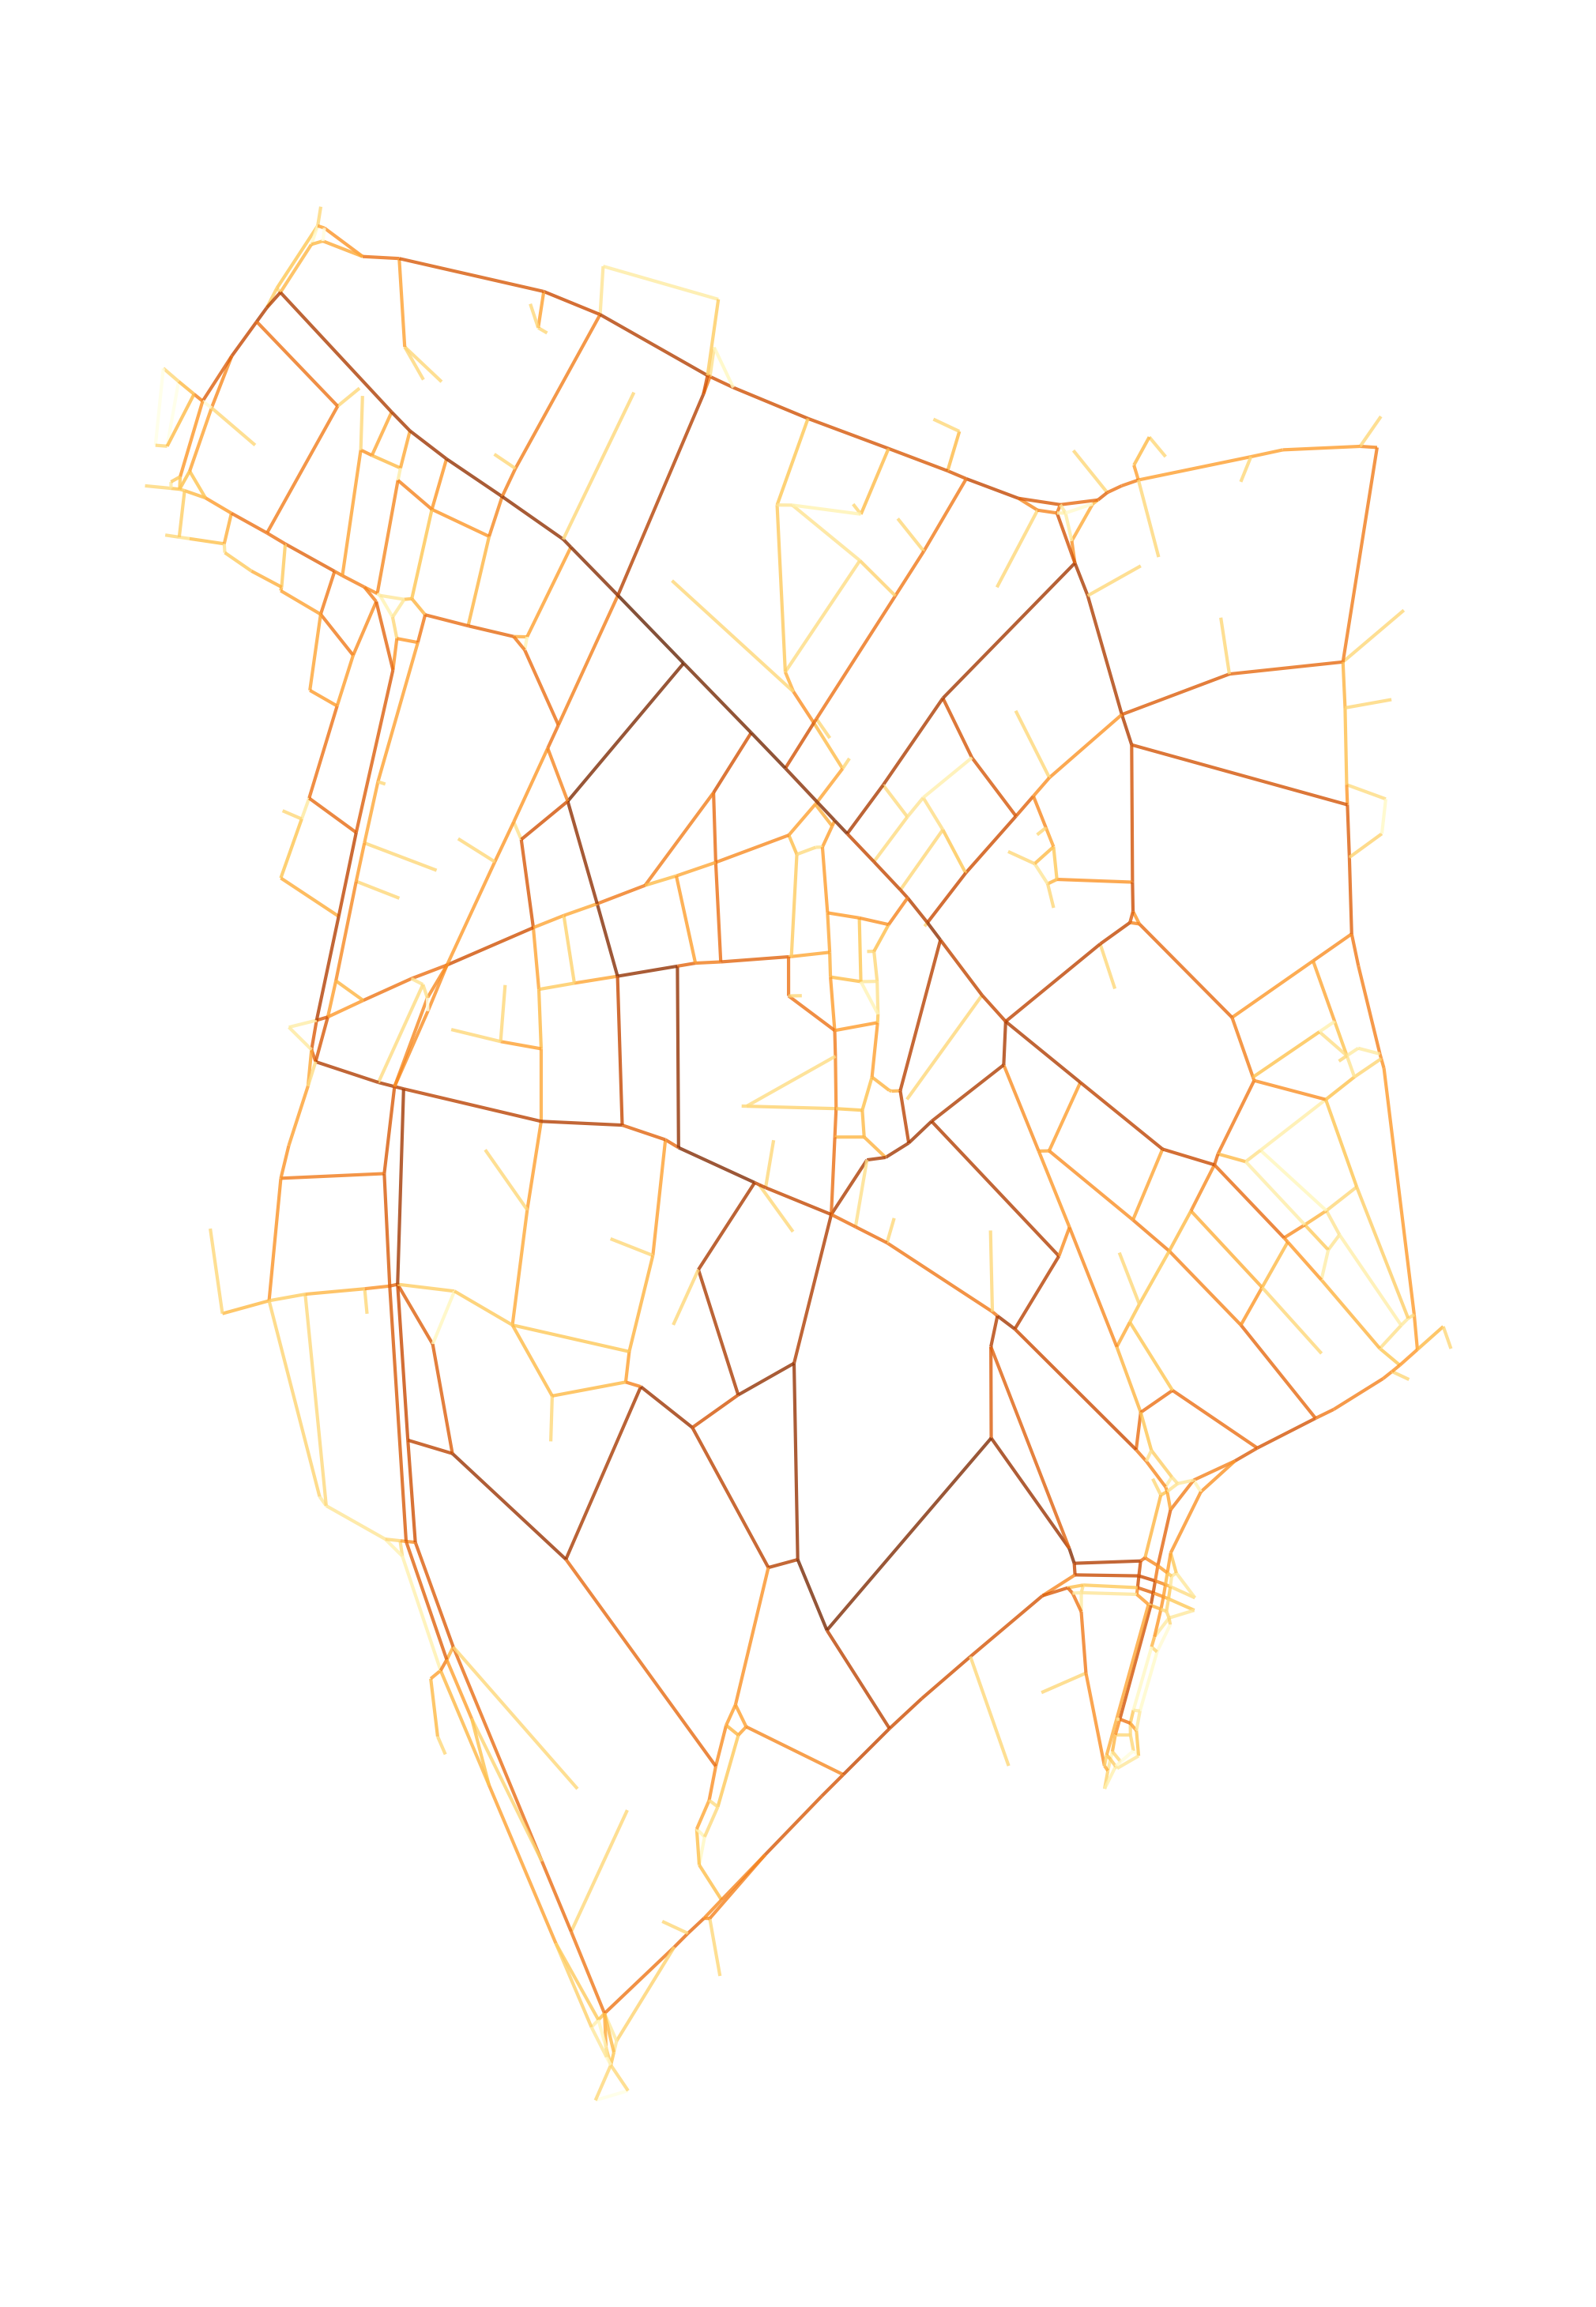

In [329]:
nx.set_node_attributes(H, {d[0]:[d[1]['x'], d[1]['y']] for d in H.nodes(data=True)}, 'pos')
pos = nx.get_node_attributes(H, 'pos')

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.figure(figsize=(2000*px, 2900*px))

drawing = nx.draw(H,     
    pos = pos,
    edgelist=list(q.keys()),
    node_size=0,
    edge_color=list(q.values()), vmin=vmin, vmax=vmax,
    edge_cmap=cmap, arrows=False, alpha=0.8, width=3
)


plt.axis('off')
plt.gca().set_position([0, 0, 1, 1])

fname = 'edge_bw_'
plt.savefig(f'./output/{fname}{cmap.name}.png', dpi='figure', bbox_inches='tight')
plt.savefig(f'./output/{fname}{cmap.name}.svg')

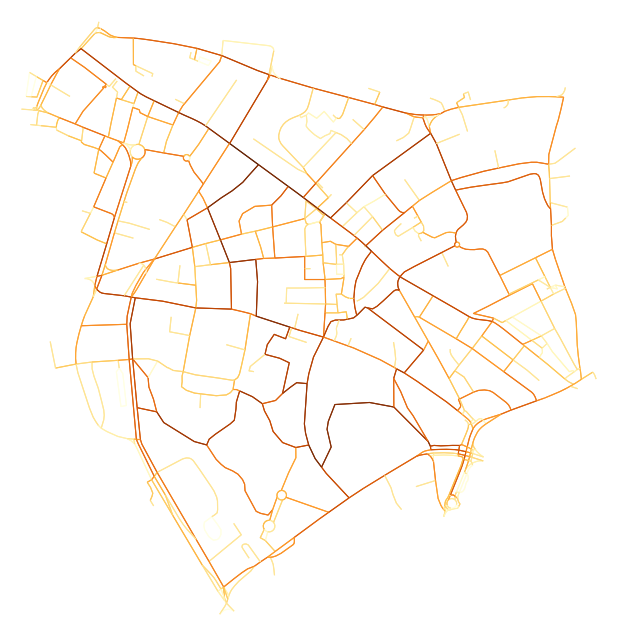

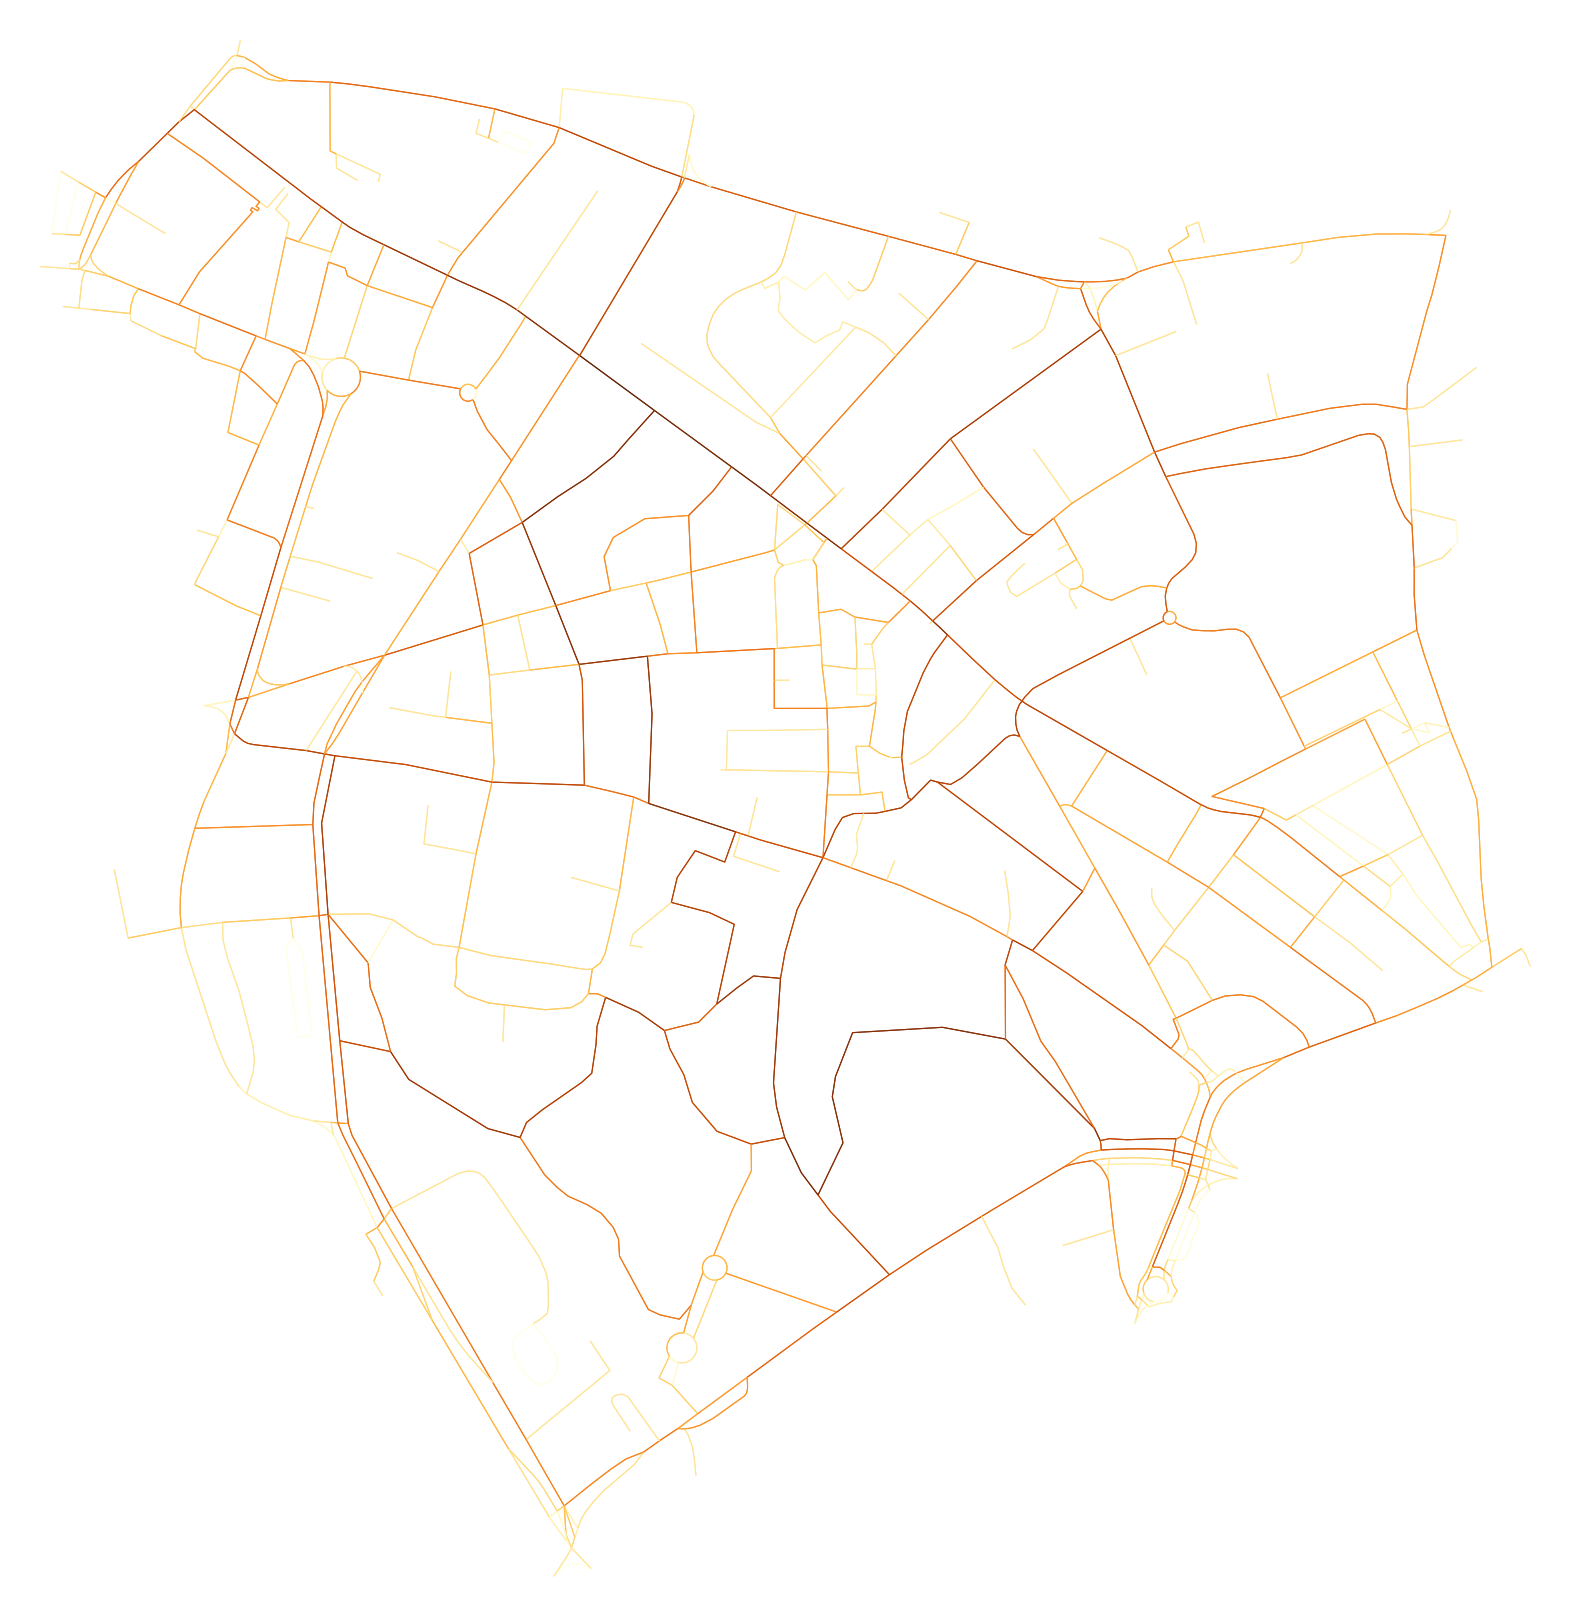

In [355]:
q2 = nx.edge_betweenness_centrality(G)
q2 = {k: np.log10(v+1e-3) for k, v in q2.items()}
nx.set_edge_attributes(G, q2, 'bw_centrality')

fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.8,
    edge_color=ox.plot.get_edge_colors_by_attr(G,'bw_centrality',cmap=cmap.name),  bgcolor='white')

fig.set_size_inches(2000*px, 2900*px)
fig

/Users/raphael/Programs/miniconda3/envs/yahel/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


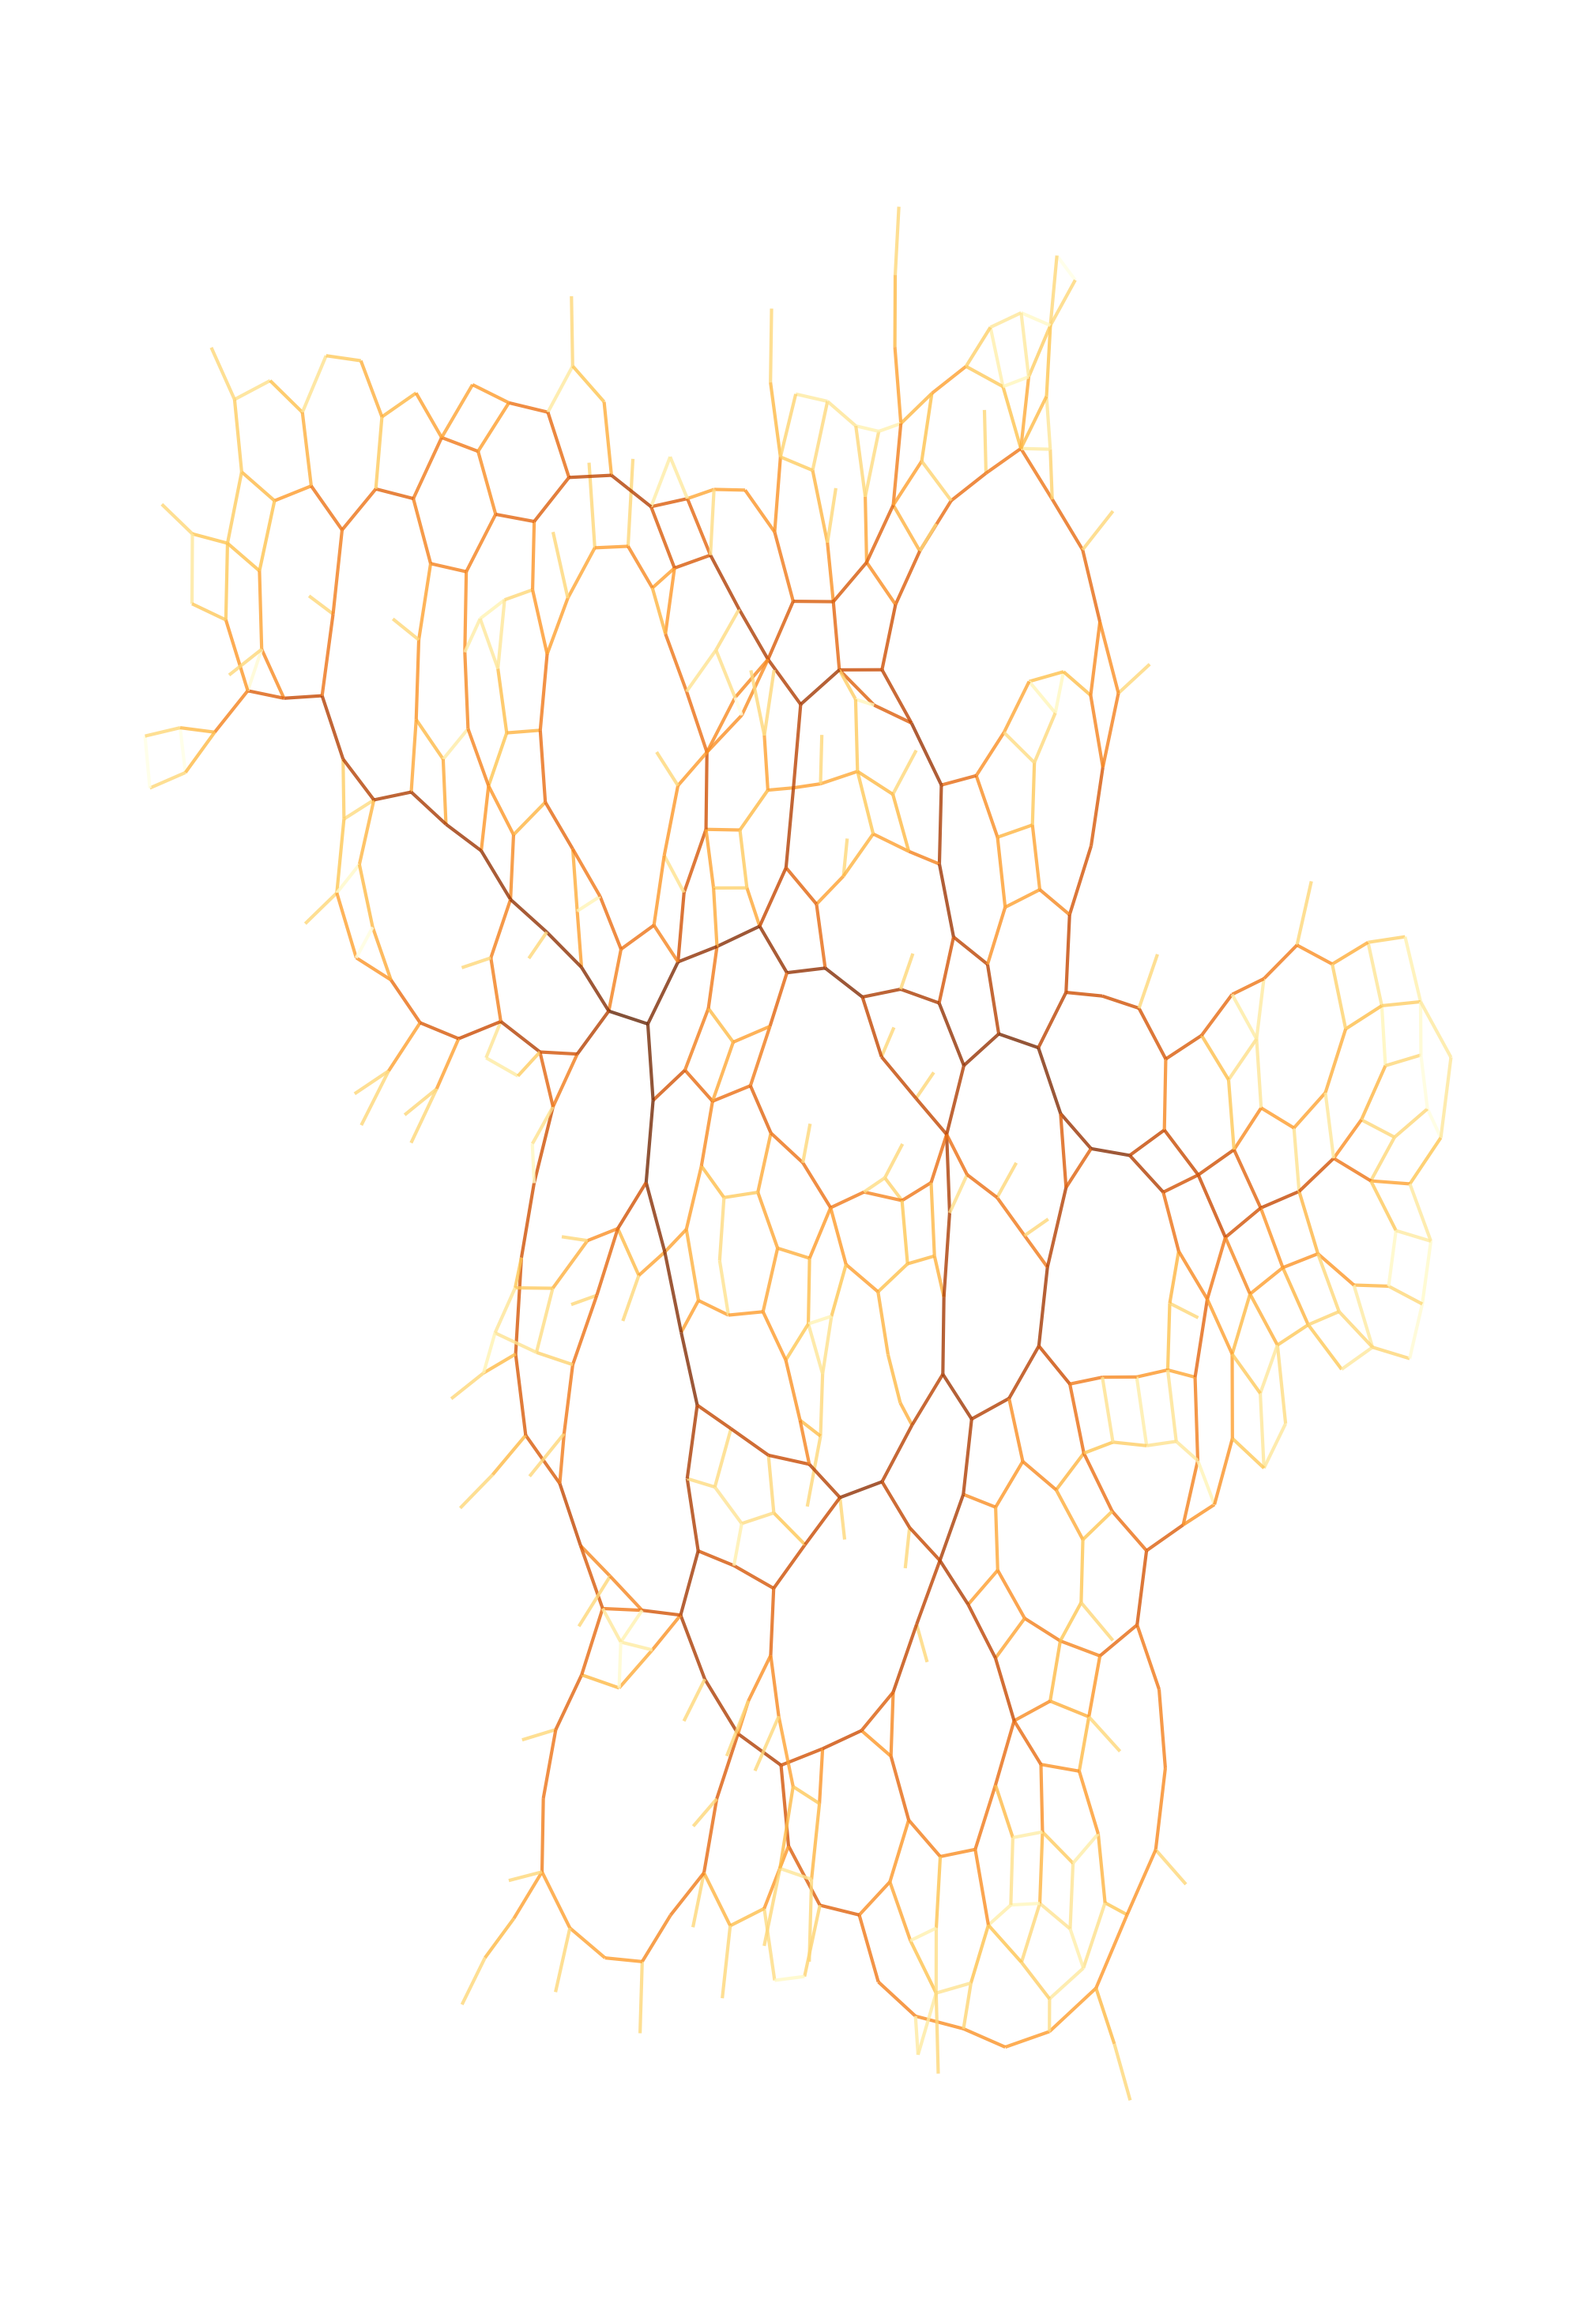

In [372]:
nx.set_node_attributes(H, {d[0]:[d[1]['x'], d[1]['y']] for d in H.nodes(data=True)}, 'pos')
pos = nx.get_node_attributes(H, 'pos')

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.figure(figsize=(2000*px, 2900*px))

drawing = nx.draw(H,     
    pos = nx.kamada_kawai_layout(H,dim=2,scale=2),
    edgelist=list(q.keys()),
    node_size=0,
    edge_color=list(q.values()), vmin=vmin, vmax=vmax,
    edge_cmap=cmap, arrows=False, alpha=0.8, width=3
)


plt.axis('off')
plt.gca().set_position([0, 0, 1, 1])

fname = 'edge_bw_'
plt.savefig(f'./output/{fname}{cmap.name}.png', dpi='figure', bbox_inches='tight')
plt.savefig(f'./output/{fname}{cmap.name}.svg')

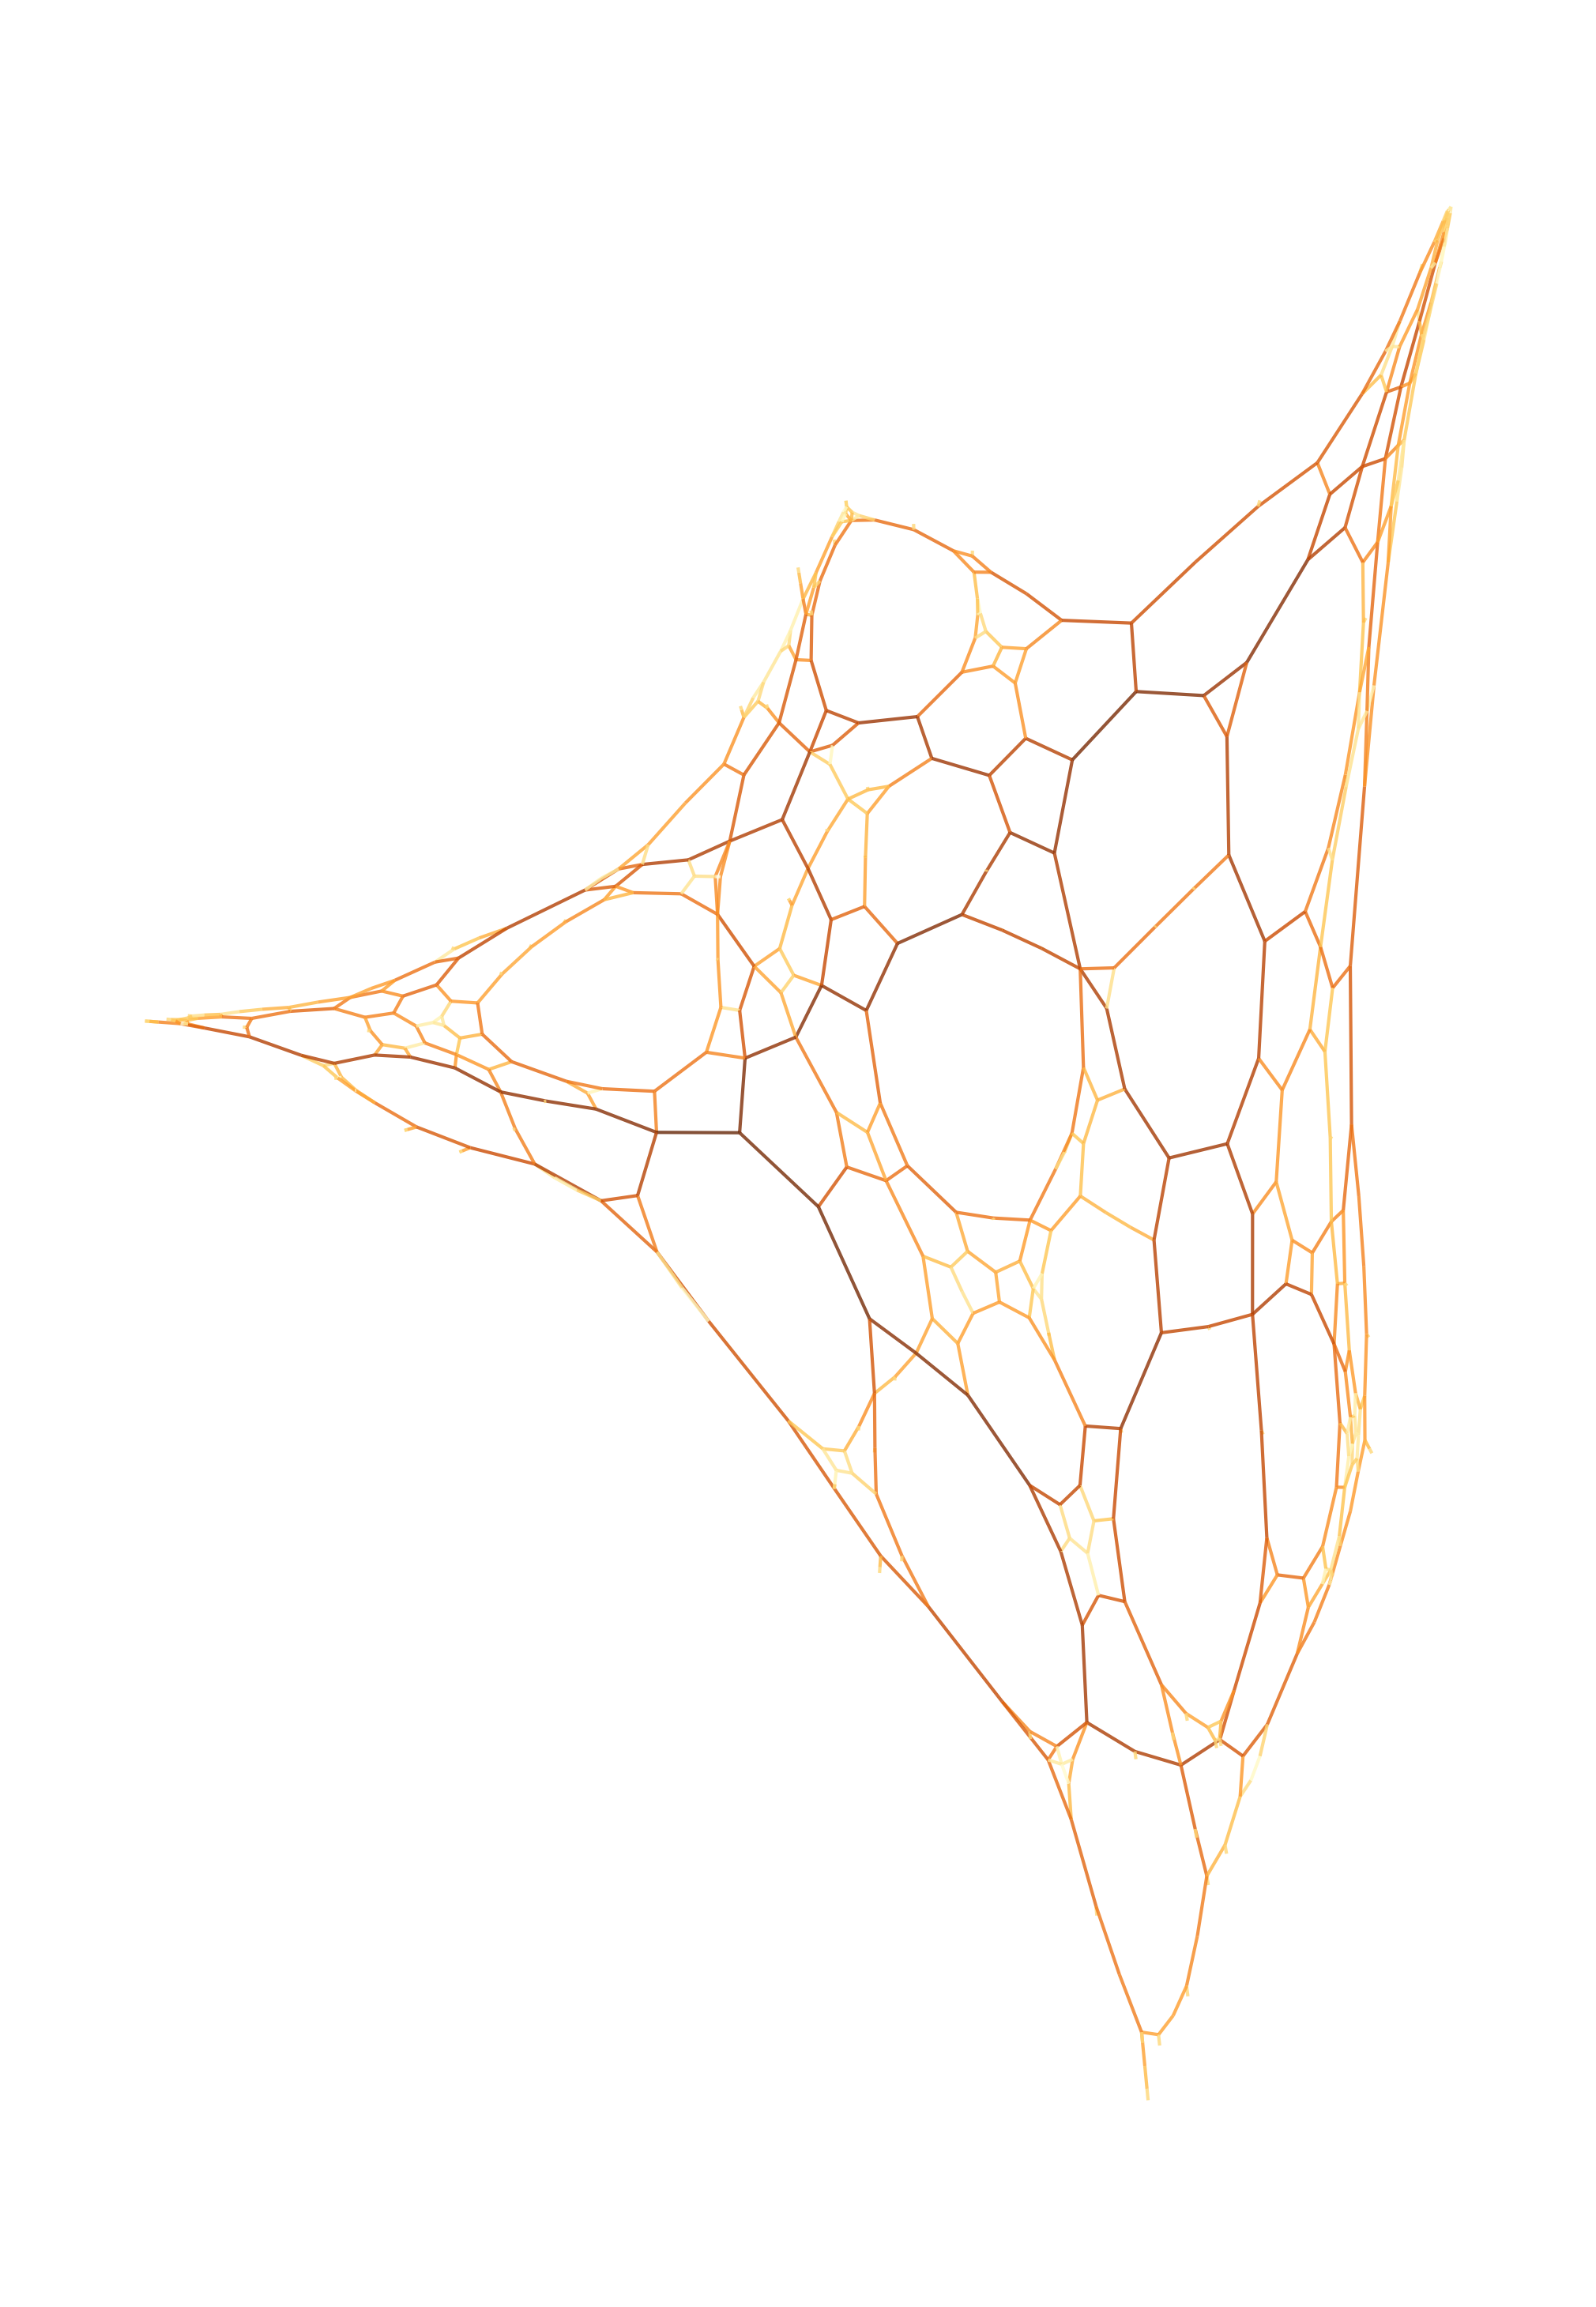

In [366]:
nx.set_node_attributes(H, {d[0]:[d[1]['x'], d[1]['y']] for d in H.nodes(data=True)}, 'pos')
pos = nx.get_node_attributes(H, 'pos')

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.figure(figsize=(2000*px, 2900*px))

drawing = nx.draw(H,     
    pos = nx.spectral_layout(H),
    edgelist=list(q.keys()),
    node_size=0,
    edge_color=list(q.values()), vmin=vmin, vmax=vmax,
    edge_cmap=cmap, arrows=False, alpha=0.8, width=3
)


plt.axis('off')
plt.gca().set_position([0, 0, 1, 1])

fname = 'edge_bw_'
plt.savefig(f'./output/{fname}{cmap.name}.png', dpi='figure', bbox_inches='tight')
plt.savefig(f'./output/{fname}{cmap.name}.svg')